In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [253]:
#all list,like migrantPool,resource,1st index is the resource allocated to cs(coopeartive small), 2nd is cl, 3rd is ss, 4th is sl
K = 0.1 
# death rate
R_small = 4
# Resource for small group
R_large = 50
# Resource for large group
Gc = 0.018
#Growth rate (cooperative)
Gs = 0.02
#Growth rate (selfish)
Cc = 0.1
# Consumption rate (cooperative)
Cs = 0.2
# Consumption rate (selfish)
N = 4000
# Population size
T = 120
#Number of generations
Ns = 4
#small group size
Nl = 40
#large group size
migrantPool = [1000.0,1000.0,1000.0,1000.0]
#inital migrantPool,total 4000
resourcesPool = [0.0,0.0,0.0,0.0]
coopSmallGroupsFre = list();
coopLargeGroupsFre = list();
selfSmallGroupsFre = list();
selfLargeGroupsFre = list();
largeGroupFre = list();
selfGroupFre = list();
t = 4
# timesteps

In [3]:
def calculateResource(group, resource):
    total = (group[0] * Gc * Cc) + (group[1] * Gc *Cc) + (group[2] * Gs * Cs) + (group[3] * Gs * Cs)
    resourcesPool[0] = (group[0] * Gc * Cc * resource) / total
    resourcesPool[1] = (group[1] * Gc * Cc * resource) / total
    resourcesPool[2] = (group[2] * Gs * Cs * resource) / total
    resourcesPool[3] = (group[3] * Gs * Cs * resource) / total
    return resourcesPool

In [4]:
def calculatePopulation(group, resourcesPool):
    group[0] = group[0] + resourcesPool[0] / Cc - x * group[0]
    group[1] = group[1] + resourcesPool[1] / Cc - K * group[1]
    group[2] = group[2] + resourcesPool[2] / Cs - K * group[2]
    group[3] = group[3] + resourcesPool[3] / Cs - K * group[3]
    return group

In [252]:
for i in range(T):
    #record the frequency for ploting     
    coopSmallGroupsFre.append(migrantPool[0] / N )
    coopLargeGroupsFre.append(migrantPool[1] / N )
    selfSmallGroupsFre.append(migrantPool[2] / N )
    selfLargeGroupsFre.append(migrantPool[3] / N )
    largeGroupFre.append((migrantPool[1]+migrantPool[3]) / N )
    selfGroupFre.append((migrantPool[2]+migrantPool[3]) / N )
    
    #create groups according to the proportions 
    #and divided them into small group and large group for the convenience of calculating population   
    smallGroupNumber = int(( migrantPool[0] + migrantPool [2]) / Ns )
    largeGroupNumber = int(( migrantPool[1] + migrantPool [3]) / Nl )
    smallGroups = list()
    largeGroups = list()
    if(smallGroupNumber):
        small_cooperative_rate = migrantPool[0]/(migrantPool[0] + migrantPool[2])
    if(largeGroupNumber):
        large_cooperative_rate = migrantPool[1]/(migrantPool[1] + migrantPool[3])
    for i in range(smallGroupNumber):
        group = [0,0,0,0]
        for i in range(Ns):
            if(random.random() < small_cooperative_rate):
                group[0] += 1 
            else:
                group[2] += 1
        smallGroups.append(group)
    for i in range(largeGroupNumber):
        group = [0,0,0,0]
        for i in range(Nl):
            if(random.random() < large_cooperative_rate):
                group[1] += 1 
            else:
                group[3] += 1
        largeGroups.append(group)
        
    # reproduction   
    for group in smallGroups:
        for i in range(t):
            smallGroupResource = calculateResource(group, R_small)
            calculatePopulation(group, smallGroupResource)
    for group in largeGroups:
        for i in range(t):
            largeGroupResource = calculateResource(group, R_large)
            calculatePopulation(group, largeGroupResource)
    
    # Rescale the migrant pool
    migrantPool = [0.0, 0.0, 0.0, 0.0]
    for group in (smallGroups):
        for i in range(4):
            migrantPool[i] += group[i] 
    for group in (largeGroups):
        for i in range(4):
            migrantPool[i] += group[i]
    a = N / sum(migrantPool)
    for i in range(4):
        migrantPool[i] = migrantPool[i] * a       
    print(migrantPool)

[886.6686568216112, 976.3340643739343, 924.7430368714693, 1212.2542419329852]
[849.4081433497834, 905.8695352156864, 831.0524615829821, 1413.6698598515482]
[833.5410066322594, 816.5736241055891, 763.392222035148, 1586.4931472270039]
[778.7554490763931, 692.3457707397446, 746.2115179212697, 1782.6872622625929]
[754.5311053904599, 604.810889031594, 730.6217812954811, 1910.036224282465]
[788.3796708765547, 500.38301855219197, 692.9029673699467, 2018.3343432013064]
[808.9665084562424, 430.9077369487473, 688.141675423895, 2071.984079171116]
[799.5099910644095, 357.3269179817701, 714.0466226554659, 2129.1164682983544]
[820.3890390989807, 298.06749640726326, 717.6102722424521, 2163.9331922513043]
[848.3644786530414, 247.98855571793965, 731.5132003094188, 2172.1337653196]
[892.6731310159714, 193.16263180829682, 743.4229978768136, 2170.741239298918]
[919.1215107068375, 163.8936067527403, 773.2508100652651, 2143.7340724751566]
[919.6306810953856, 116.17790768854958, 836.3122172605473, 2127.87919

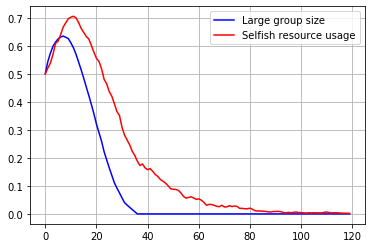

In [8]:
plt.plot(range(T), largeGroupFre, 'b', range(T), selfGroupFre, 'r')
plt.grid(True)
plt.gca().legend(('Large group size','Selfish resource usage'))

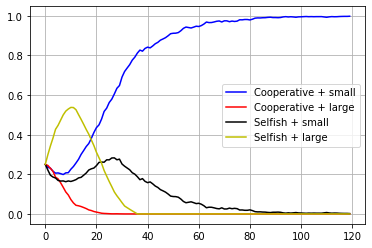

In [9]:
plt.plot(range(T), coopSmallGroupsFre, 'b', range(T), coopLargeGroupsFre, 'r', 
         range(T), selfSmallGroupsFre, 'k', range(T), selfLargeGroupsFre, 'y')
plt.grid(True)
plt.gca().legend(('Cooperative + small','Cooperative + large','Selfish + small','Selfish + large'))

In [249]:
def newCalculatePopulation(group, resourcesPool, T, deathRate):
    group[0] = group[0] + resourcesPool[0] / Cc - deathRate * (1+math.cos(T)) * group[0]
    group[1] = group[1] + resourcesPool[1] / Cc - deathRate * (1+math.cos(T)) * group[1]
    group[2] = group[2] + resourcesPool[2] / Cs - deathRate * (1+math.cos(T)) * group[2]
    group[3] = group[3] + resourcesPool[3] / Cs - deathRate * (1+math.cos(T)) * group[3]
    return group

In [250]:
def newCalculateResource(group, resource, T):
    total = (group[0] * (Gc * (1+math.sin(T))) * Cc) + (group[1] * (Gc * (1+math.sin(T))) * Cc)+ (group[2] * (Gc * (1+math.sin(T))) * Cs) + (group[3] * (Gc * (1+math.sin(T))) * Cs)
    resourcesPool[0] = (group[0] * (Gc * (1+math.sin(T))) * Cc * resource) / total
    resourcesPool[1] = (group[1] * (Gc * (1+math.sin(T))) * Cc * resource) / total
    resourcesPool[2] = (group[2] * (Gc * (1+math.sin(T))) * Cs * resource) / total
    resourcesPool[3] = (group[3] * (Gc * (1+math.sin(T))) * Cs * resource) / total
    return resourcesPool

In [254]:
deathRate = [0.1,0.01,0.001,0.2]
for tt in range(T):
    #record the frequency for ploting     
    coopSmallGroupsFre.append(migrantPool[0] / N )
    coopLargeGroupsFre.append(migrantPool[1] / N )
    selfSmallGroupsFre.append(migrantPool[2] / N )
    selfLargeGroupsFre.append(migrantPool[3] / N )
    largeGroupFre.append((migrantPool[1]+migrantPool[3]) / N )
    selfGroupFre.append((migrantPool[2]+migrantPool[3]) / N )
    
    #create groups according to the proportions 
    #and divided them into small group and large group for the convenience of calculating population   
    smallGroupNumber = int(( migrantPool[0] + migrantPool [2]) / (Ns+(math.sin(tt)-math.cos(tt))) )
    largeGroupNumber = int(( migrantPool[1] + migrantPool [3]) / (Nl+(math.sin(tt)-math.cos(tt))) )

    smallGroups = list()
    largeGroups = list()
    if(smallGroupNumber):
        small_cooperative_rate = migrantPool[0]/(migrantPool[0] + migrantPool[2])
    if(largeGroupNumber):
        large_cooperative_rate = migrantPool[1]/(migrantPool[1] + migrantPool[3])
    for i in range(smallGroupNumber):
        group = [0,0,0,0]
        for i in range(int(Ns+(math.sin(tt)-math.cos(tt)))):
            if(random.random() < small_cooperative_rate):
                group[0] += 1 
            else:
                group[2] += 1
        smallGroups.append(group)
    for i in range(largeGroupNumber):
        group = [0,0,0,0]
        for i in range(int(Nl +(math.sin(tt)-math.cos(tt)))):
            if(random.random() < large_cooperative_rate):
                group[1] += 1 
            else:
                group[3] += 1
        largeGroups.append(group)
    # reproduction   
    for group in smallGroups:
        for i in range(t):
            smallGroupResource = newCalculateResource(group, R_small,tt)
            newCalculatePopulation(group, smallGroupResource,tt,deathRate[i])
    for group in largeGroups:
        for i in range(t):
            largeGroupResource = newCalculateResource(group, R_large,tt)
            newCalculatePopulation(group, largeGroupResource,tt,deathRate[i])
    
    # Rescale the migrant pool
    migrantPool = [0.0, 0.0, 0.0, 0.0]
    for group in (smallGroups):
        for i in range(4):
            migrantPool[i] += group[i] 
    for group in (largeGroups):
        for i in range(4):
            migrantPool[i] += group[i]
    a = N / sum(migrantPool)
    for i in range(4):
        migrantPool[i] = migrantPool[i] * a       
    print(migrantPool)

[848.688034350436, 1180.4119789808385, 779.4047381798362, 1191.495248488889]
[880.7731552991553, 1238.4556472451268, 657.6355174568021, 1223.1356799989162]
[1170.1855696231733, 1153.8609001610657, 607.7018677714333, 1068.251662444328]
[1443.6032376546018, 1041.300618064467, 553.9583635996844, 961.1377806812467]
[1453.442194062176, 1072.1516222282455, 485.85098186560344, 988.5552018439757]
[1290.1290270613085, 1256.5158665100764, 385.7344535290078, 1067.6206528996074]
[1148.0074679612421, 1404.8003128212563, 282.8515590173438, 1164.3406602001578]
[1160.3964917582798, 1414.5125818617096, 244.13348973148703, 1180.9574366485238]
[1481.7474241262219, 1260.8775253654853, 233.4337145536667, 1023.9413359546261]
[1920.8178607117864, 1052.4785571810708, 201.00302663933883, 825.7005554678041]
[2108.2386750375085, 973.8324533126187, 154.612739217661, 763.3161324322116]
[2044.2804592571135, 1039.4335446698865, 117.3209204096793, 798.9650756633208]
[1909.880255707036, 1107.106859926222, 97.462113625

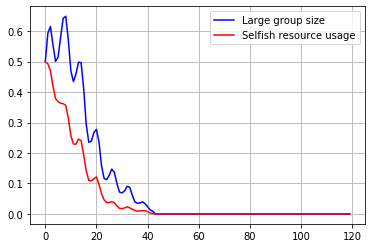

In [255]:
plt.plot(range(T), largeGroupFre, 'b', range(T), selfGroupFre, 'r')
plt.grid(True)
plt.gca().legend(('Large group size','Selfish resource usage'))

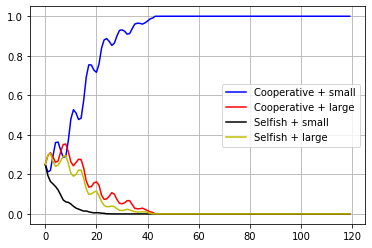

In [256]:
plt.plot(range(T), coopSmallGroupsFre, 'b', range(T), coopLargeGroupsFre, 'r', 
         range(T), selfSmallGroupsFre, 'k', range(T), selfLargeGroupsFre, 'y')
plt.grid(True)
plt.gca().legend(('Cooperative + small','Cooperative + large','Selfish + small','Selfish + large'))